In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gmplot
from IPython.core.display import display, HTML
%matplotlib inline

In [3]:
df_raw = pd.read_csv("~/Desktop/SDMTS/output.txt")
print(len(df_raw.index))
df = df_raw[df_raw.dist_travelled.notnull()]
print(len(df.index))
df = df[df.velocity.notnull()]
print(len(df.index))
#df.head()
df = df.drop_duplicates()
print(len(df.index))

216237
210706
172521
172521


In [8]:
raw = pd.read_csv("~/Desktop/SDMTS/ParsedFeedData/Completed/2017-07-08.csv")
print(len(raw.index))
raw = raw.drop_duplicates()
print(len(raw.index))

182105
113249


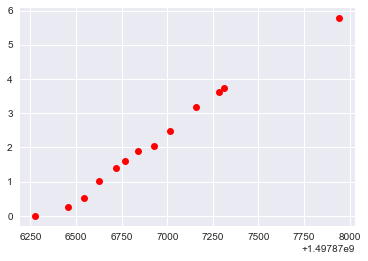

In [21]:
#test_vehicle = df[df.vehicle_id == 2731]
test_vehicle = df[df.trip_id == 12341775]
test_vehicle = test_vehicle.sort_values(by="timestamp", )
test_vehicle.reset_index(drop=True, inplace=True)
start = 300
window = 100

#plt.plot(test_vehicle[start:start+window].timestamp, test_vehicle[start:start+window].dist_travelled, 'ro')
plt.plot(test_vehicle.timestamp, test_vehicle.dist_travelled, 'ro')

plt.show()

In [24]:
test_vehicle

,route,trip_id,timestamp,latitude,longitude,vehicle_id,dist_travelled,velocity,v_lat,v_lon
0,202,12341775,1497876275,32.8727,-117.214,1116,0.000000,0.000602,-0.999986,-0.005277
1,202,12341775,1497876457,32.8670,-117.214,1116,0.247000,0.001638,-0.223252,-0.974761
2,202,12341775,1497876546,32.8674,-117.219,1116,0.520000,0.003809,-0.797659,-0.603108
3,202,12341775,1497876626,32.8617,-117.223,1116,1.016000,0.005623,-1.000000,0.000000
4,202,12341775,1497876719,32.8647,-117.225,1116,1.393000,0.004087,0.777016,-0.629481
5,202,12341775,1497876767,32.8682,-117.225,1116,1.597000,0.004179,0.999927,-0.012047
6,202,12341775,1497876839,32.8683,-117.229,1116,1.886000,0.003406,-0.118720,-0.992928
7,202,12341775,1497876926,32.8676,-117.233,1116,2.042003,0.002626,-0.182474,-0.983211
8,202,12341775,1497877013,32.8643,-117.236,1116,2.488000,0.005013,0.966235,-0.257663
9,202,12341775,1497877157,32.8749,-117.239,1116,3.174001,0.004473,0.853282,-0.521450


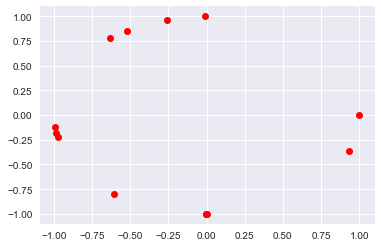

In [26]:
#test_vehicle = df[df.vehicle_id == 2731]
test_vehicle = df[df.trip_id == 12341775]
test_vehicle = test_vehicle.sort_values(by="timestamp", )
test_vehicle.reset_index(drop=True, inplace=True)
start = 300
window = 100

#plt.plot(test_vehicle[start:start+window].timestamp, test_vehicle[start:start+window].dist_travelled, 'ro')
plt.plot(test_vehicle.v_lon, test_vehicle.v_lat, 'ro')

plt.show()

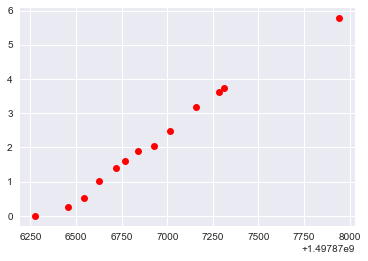

In [25]:
started = False

for i in range(0, len(test_vehicle.index)-2):
    
    if test_vehicle.iloc[i].dist_travelled < 1.0:
        started = True
    
    if not started:
        test_vehicle.loc[i, "dist_travelled"] = 0.0
        continue
    
    if test_vehicle.iloc[i+1].dist_travelled == 0.0:
        test_vehicle.loc[i, "dist_travelled"] = 0.0
    if (test_vehicle.iloc[i+1].dist_travelled < test_vehicle.iloc[i].dist_travelled):
        test_vehicle.loc[i+1, "dist_travelled"] = 0.5 * (test_vehicle.iloc[i+2].dist_travelled + test_vehicle.iloc[i].dist_travelled)
        
plt.plot(test_vehicle.timestamp, test_vehicle.dist_travelled, 'ro')
plt.show()

In [5]:
#test_vehicle.trip_id.astype("category").describe()
#test_vehicle.iloc[245:245+37].dist_travelled

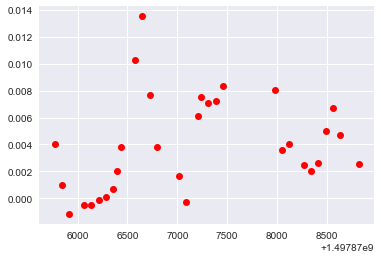

In [11]:
def getVel(entity1, entity2):
    return (entity1.dist_travelled - entity2.dist_travelled) / (entity1.timestamp - entity2.timestamp)

test_vehicle.loc[0, "velocity"] = getVel(test_vehicle.iloc[1], test_vehicle.iloc[0])
test_vehicle.loc[len(test_vehicle.index)-1, "velocity"] = getVel(test_vehicle.iloc[len(test_vehicle.index)-1], test_vehicle.iloc[len(test_vehicle.index)-2])

for i in range(1, len(test_vehicle.index)-1):
    
    back = getVel(test_vehicle.iloc[i], test_vehicle.iloc[i-1])
    
    front = getVel(test_vehicle.iloc[i+1], test_vehicle.iloc[i])
    
    vel = 0.5 * (back + front)
    test_vehicle.loc[i, "velocity"] = vel
    
plt.plot(test_vehicle.timestamp, test_vehicle.velocity, 'ro')
plt.show()

Drop heads and tails
Check places.txt

In [10]:
places = pd.read_csv("~/Desktop/SDMTS/Static_Info/places.txt")
shapes = pd.read_csv("~/Desktop/SDMTS/Static_Info/shapes.txt")
center_lat = places.place_lat.median(axis=0)
center_lon = places.place_long.median(axis=0)
zoom = 12
#gmap = gmplot.GoogleMapPlotter(center_lat, center_lon, zoom)
#gmap.scatter(df.latitude, df.longitude, "#0066ff", size=100, marker=False)
#gmap.scatter(places.place_lat, places.place_long, "#f45342", size=100, marker=False)
#gmap.draw("mymap.html")

In [12]:
len(shapes.index)

157380